## Showing functional areas related to mental imagery <br>


#### Name: Tabitha van Heerde <br> Date: 4-12-2025 <br> Link to page mental imagery: [Neurosynth](https://neurosynth.org/analyses/terms/mental%20imagery/)

### Import libraries

The code cell below imports all the libraries that were used during the assignment. 

In [4]:
from nilearn import plotting
import nibabel as nib 
from matplotlib import pyplot as plt
import numpy as np


### Locate MRI files

The code cell below shows a function that is used to import the data files based on their name and file extension. The parameter that is given to the function is the concept. If this file is stored in the same folder as the notebook, the relative path will find the file automatically. This function allows the user to locate files from multiple concepts by just calling the function with the name of the concept they want to use. 

In [5]:
#function for locating anatomical and functional (uniformity) data files, also suitable for files of the same format but from a different concept
def find_MRI(concept): 
    anatomical = r".\anatomical.nii"
    uniformity = fr".\{concept}_uniformity-test_z_FDR_0.01.nii"
    return anatomical, uniformity
    

anatomical, uniformity = find_MRI("mental imagery")


### Visualization functional data

In the code cell below, a function from nilearn is used to visualize the functional data on top of the anatomical data. With uniformity and anatomical as the data files that we retrieved in the code cell above. The color is changed by using the "cmap" parameter and the threshold is set to 0.1 to only show voxels above this intensity. In addition, the coordinates of the cuts are changed so that it shows the place where the voxel intensity is highest from every angle. 

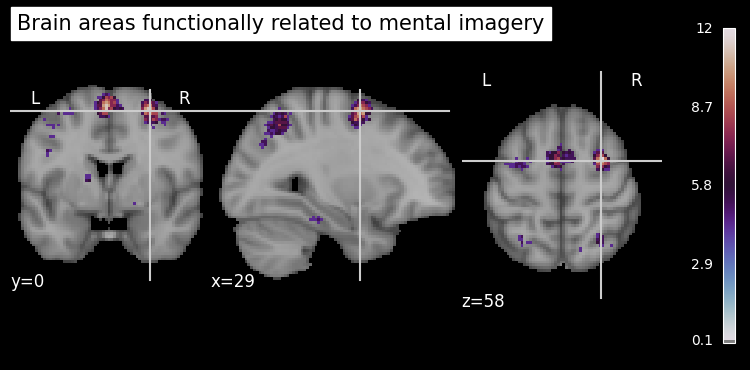

In [ ]:
#use plot_stat_map to plot functional data on top of anatomical data
plotting.plot_stat_map(stat_map_img=uniformity, bg_img=anatomical, title="Brain areas functionally related to mental imagery", cmap="twilight", cut_coords=(29,0,58), threshold=0.1)


### Histogram 

To make a histogram of the positive values in the functional data file, first the data is loaded as an array proxy by nibabel. After this, the data can be loaded as an actual array, which then can be used to loop over to select all the positive values. This loop is done by nditer, which is a function that allows you to loop over an entire multiple dimensional array at once. The positive values from the array are added to a list, which in turn is used to make a histogram. 

Text(0.5, 1.0, 'Distribution of signal intensity in voxels')

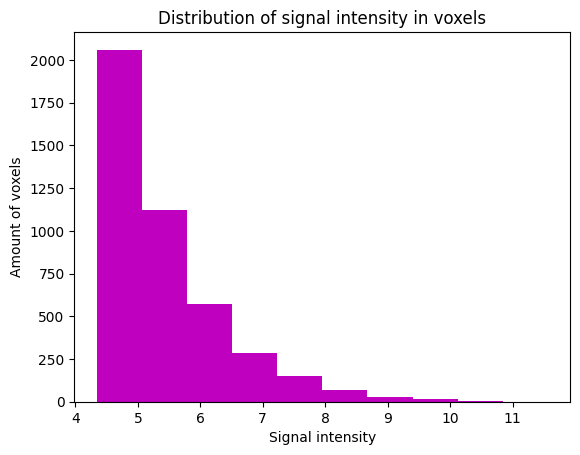

In [ ]:
#load data as array proxy and transform to actual array
img = nib.load(uniformity)
img_data = img.get_fdata()

#create list for histogram
positive = []

#loop over array of data and select positive values, add these to list 
for x in np.nditer(img_data): 
    if x > 0: 
        positive.append(x)

#plot histogram from list of positive values, with customization
plt.hist(positive, color = "m")
plt.xlabel("Signal intensity")
plt.ylabel("Amount of voxels")
plt.title("Distribution of signal intensity in voxels")